In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
readcsv = pd.read_csv("/content/drive/MyDrive/Concept of technology and AI/gender_classification_v7.csv")
df = pd.DataFrame(readcsv)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [5]:

df_filtered = df.drop(columns=['long_hair'])  # Drop column 'long_hair' instead of 'Grade'
df_filtered

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,Male
1,14.0,5.4,0,0,1,0,Female
2,11.8,6.3,1,1,1,1,Male
3,14.4,6.1,0,1,1,1,Male
4,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,Female
4997,11.9,5.4,0,0,0,0,Female
4998,12.9,5.7,0,0,0,0,Female
4999,13.2,6.2,0,0,0,0,Female


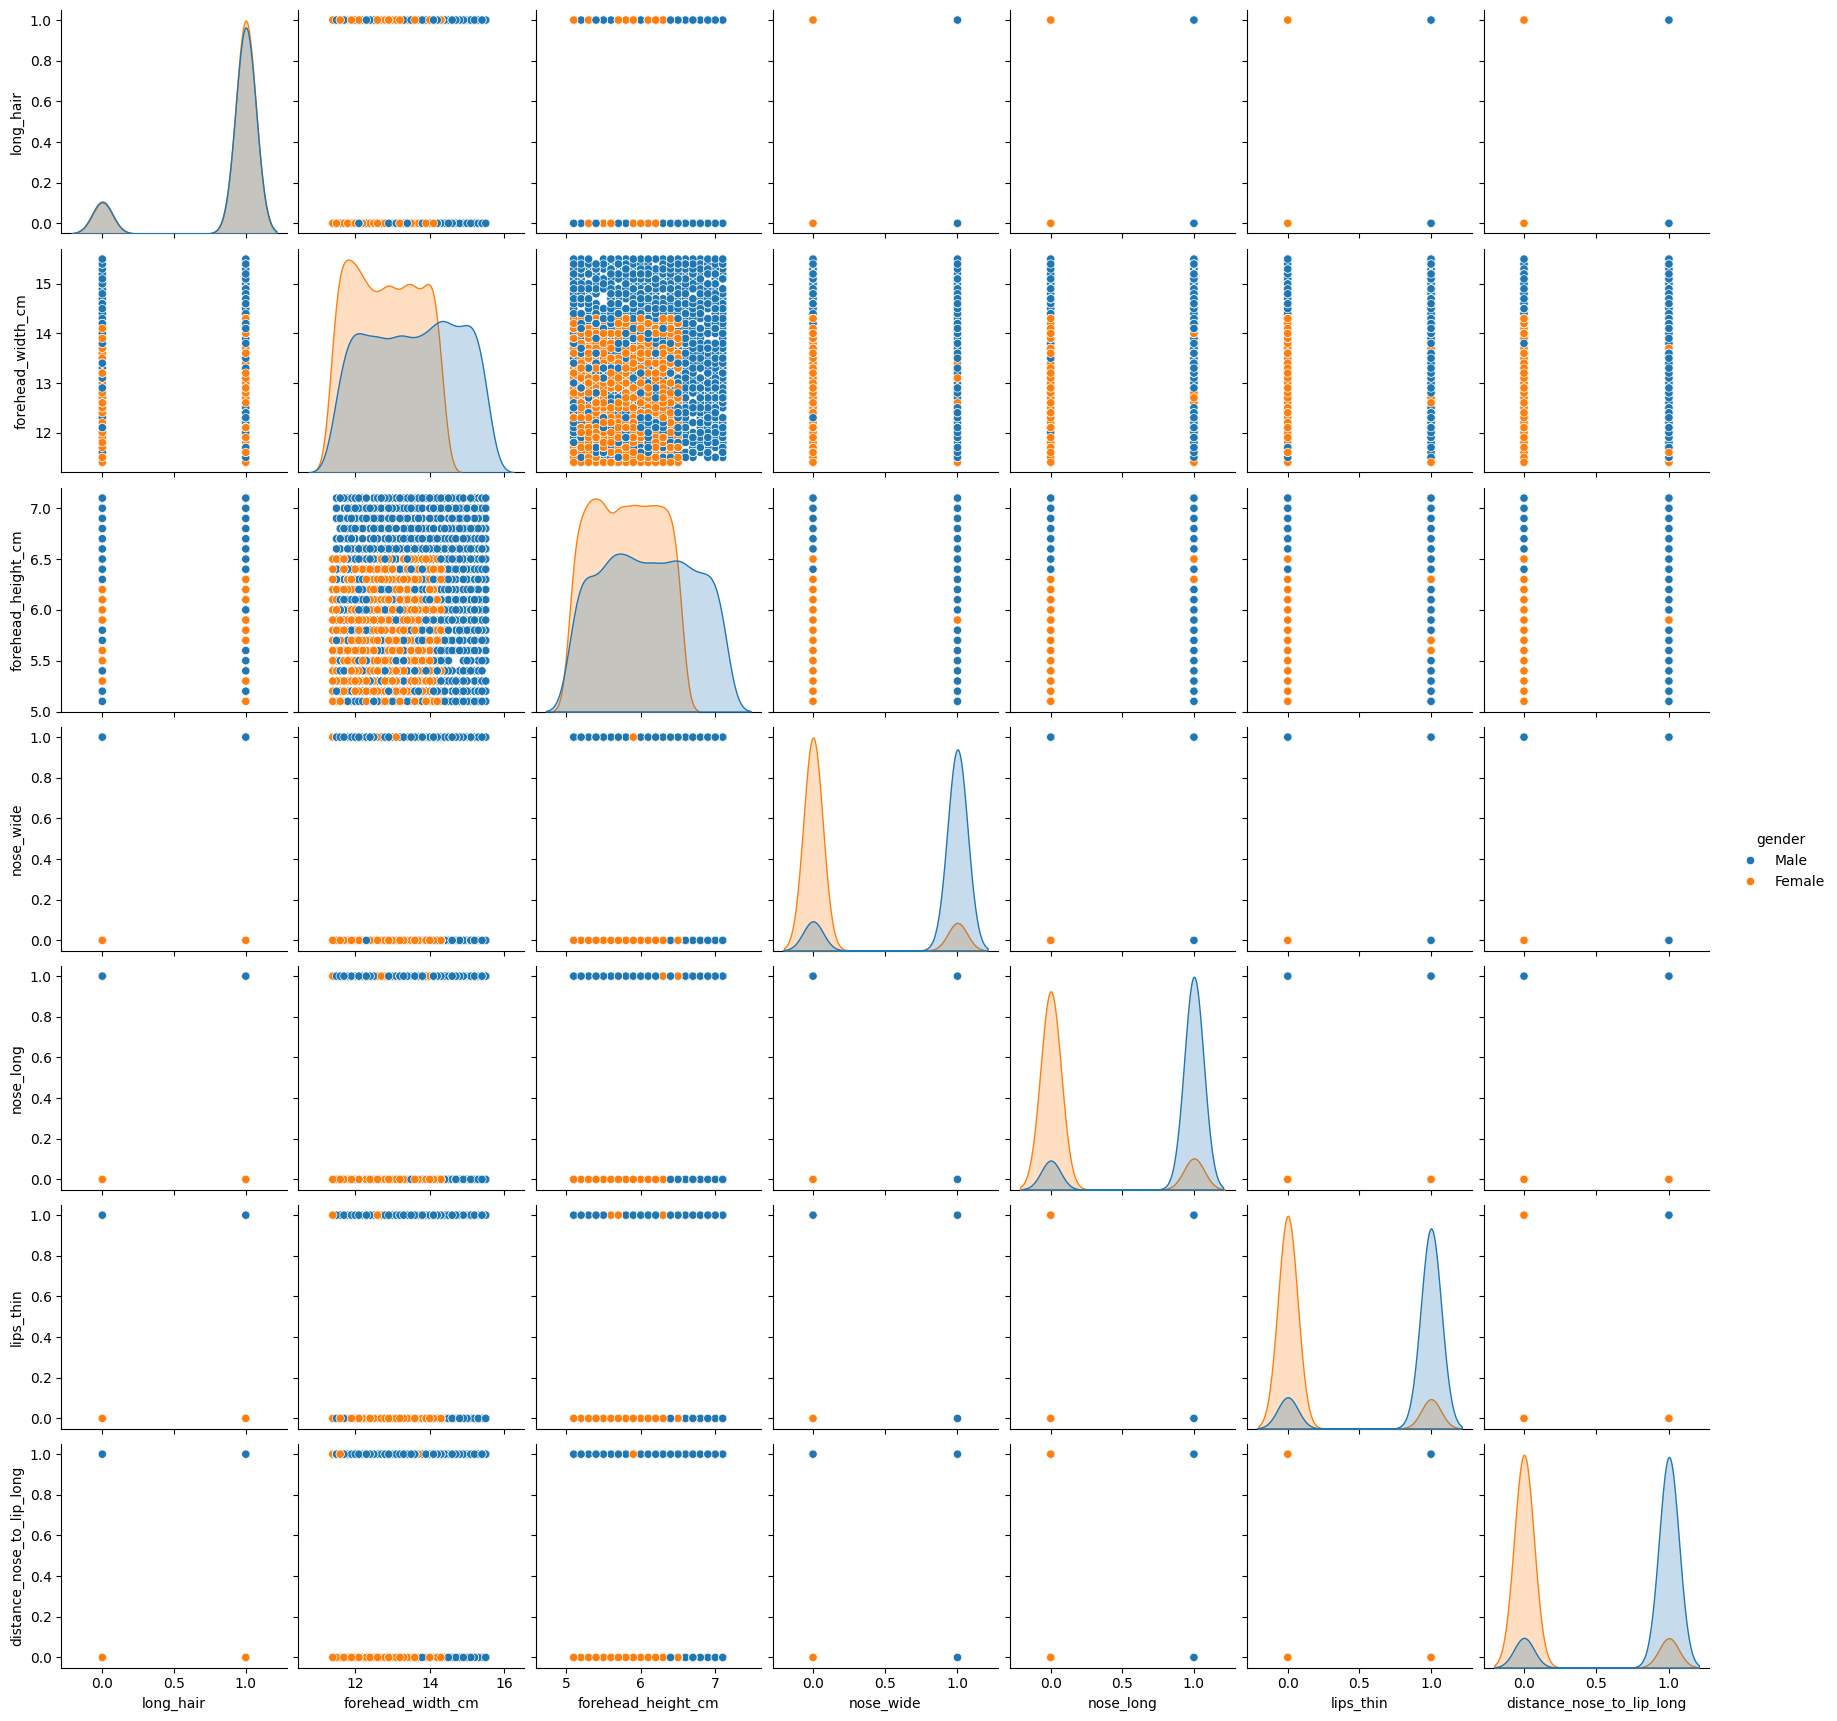

In [44]:
# Visualizations
sns.pairplot(df, hue='gender')
plt.show()

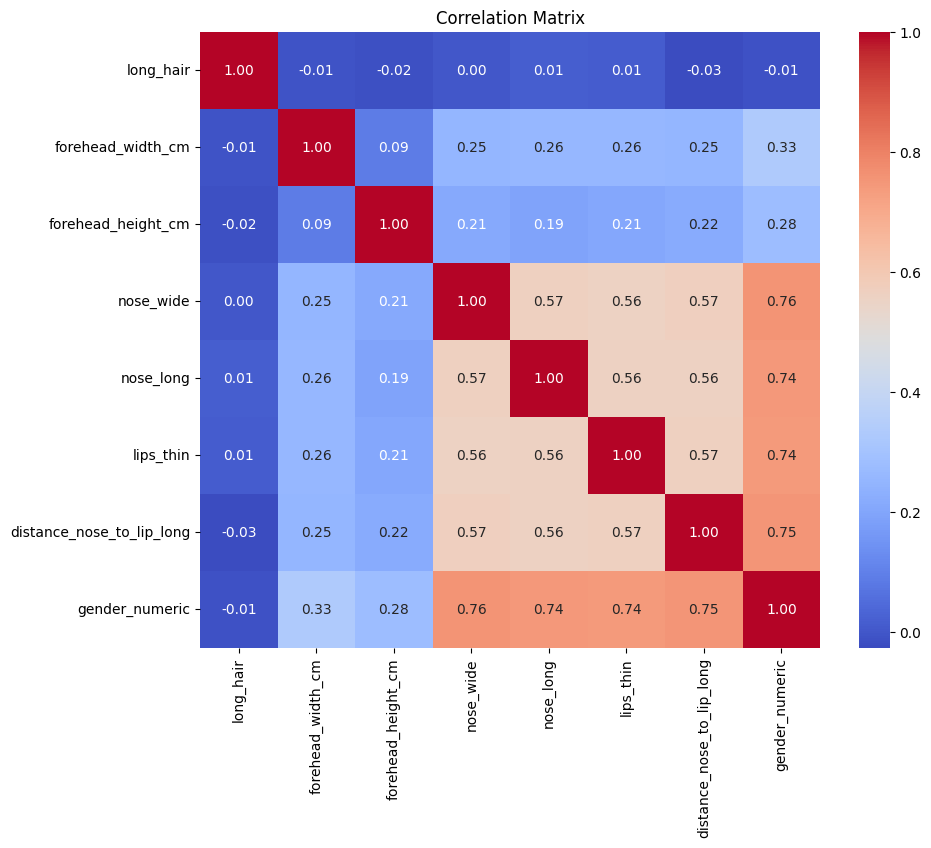

In [49]:
# correlation matrix plot
import seaborn as sns
df['gender_numeric'] = df['gender'].map({'Female': 0, 'Male': 1})
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot =True ,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# plt.colorbar()

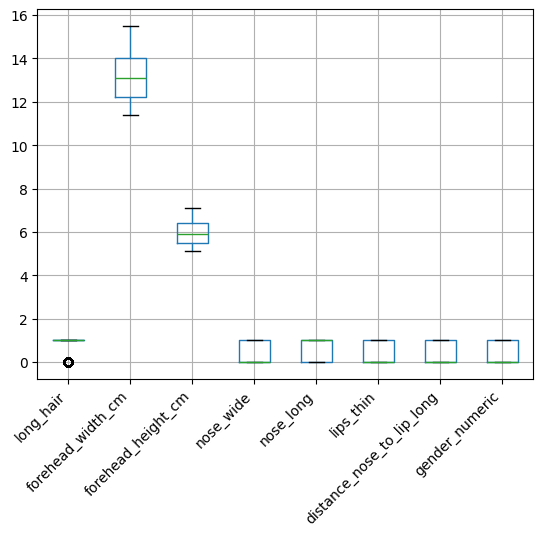

In [51]:
df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
X = df_filtered.drop(columns=['forehead_width_cm', 'gender']).values
y = df_filtered['gender'].values  # Define y with your target variable

In [7]:
# Split dataset into training and testing
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices=indices[:test_size]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_seed=42)

In [8]:
def compute_cost(y, y_predicted):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
    return cost

In [9]:
import numpy as np
import pandas as pd

def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    cost_history = []

    # Convert y to numeric using label encoding:
    unique_values = np.unique(y)
    value_mapping = {value: index for index, value in enumerate(unique_values)}

    # Apply mapping to y
    y_numeric = np.array([value_mapping[value] for value in y])
    for _ in range(iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        # Use y_numeric for cost calculation
        cost = compute_cost(y_numeric, y_predicted)
        cost_history.append(cost)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_numeric))
        db = (1 / n_samples) * np.sum(y_predicted - y_numeric)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, cost_history

In [10]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_predicted])

In [18]:

# First, train the model to get weights and bias:
weights, bias, _ = train_logistic_regression(X_train, y_train)  # Assuming X_train and y_train are your training data
# Define m (number of samples)
m = len(y)

y_predicted = predict(X, weights, bias)
y_predicted = np.array(y_predicted, dtype=np.float64)
unique_values = np.unique(y)
value_mapping = {value: index for index, value in enumerate(unique_values)}
# Convert y to numeric using the same mapping as in your train_logistic_regression function
y_numeric = np.array([value_mapping[value] for value in y], dtype=np.float64)
epsilon = 1e-15  # A small value to prevent log(0)
y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)  # Clip values to avoid 0 and 1


# Now calculate the cost:
cost = -(1/m) * np.sum(y_numeric * np.log(y_predicted) + (1 - y_numeric) * np.log(1 - y_predicted))


In [12]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_predicted])

In [19]:
# Train logistic regression model
weights, bias, cost_history = train_logistic_regression(X_train, y_train, learning_rate=0.01, iterations=1000)

In [20]:
# Evaluate model on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Define value_mapping here (or ensure it's accessible from the train_logistic_regression function)
unique_values = np.unique(y_train)  # Use y_train or y to get unique values
value_mapping = {value: index for index, value in enumerate(unique_values)}
 #value_mapping to convert y_test to numeric:
y_test_numeric = np.array([value_mapping[value] for value in y_test])

predictions = predict(X_test, weights, bias)
accuracy = accuracy_score(y_test_numeric, predictions) # Use y_test_numeric here
precision = precision_score(y_test_numeric, predictions) # Use y_test_numeric here
recall = recall_score(y_test_numeric, predictions) # Use y_test_numeric here
f1 = f1_score(y_test_numeric, predictions) # Use y_test_numeric here
conf_matrix = confusion_matrix(y_test_numeric, predictions) # Use y_test_numeric here

ROC AUC Score: 0.9520


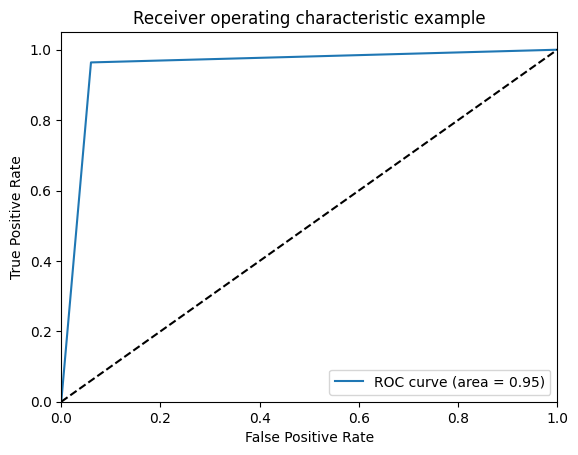

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Assuming value_mapping is defined in your train_logistic_regression function
# And it maps 'Female' to 0 and 'Male' to 1 (or vice versa)
y_test_numeric = np.array([value_mapping[value] for value in y_test])

# predictions is already numeric, but to be sure
predictions_numeric = np.array(predictions)

# Now use the numeric versions for roc_curve and roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_numeric, predictions_numeric)
roc_auc = roc_auc_score(y_test_numeric, predictions_numeric)

print(f'ROC AUC Score: {roc_auc:.4f}')
plt.figure()

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9520
Precision: 0.9413
Recall: 0.9639
F1 Score: 0.9525
Confusion Matrix:
[[471  30]
 [ 18 481]]


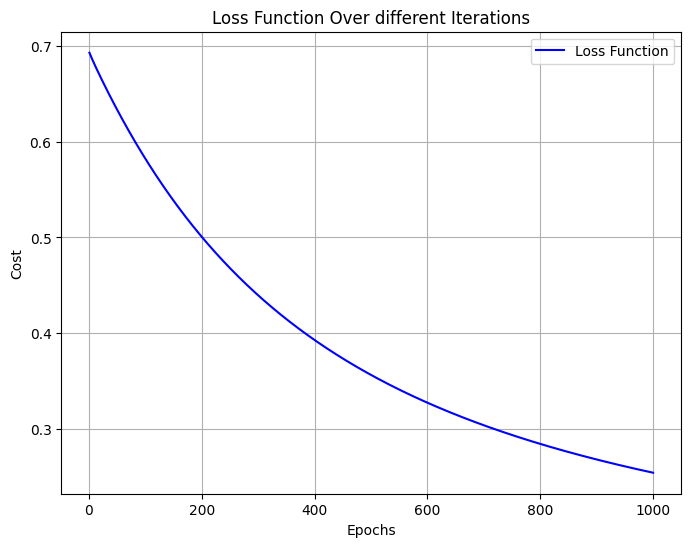

In [22]:
# Plot loss function
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, label="Loss Function", color='b')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss Function Over different Iterations")
plt.legend()
plt.grid()
plt.show()

## Train the models using the pre built in librabries


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [24]:
# Load dataset
readcsv = pd.read_csv("/content/drive/MyDrive/Concept of technology and AI/gender_classification_v7.csv")
df = pd.DataFrame(readcsv)

In [25]:
df_filtered = df.drop(columns=['long_hair'])  # Replace 'Grade' with the correct column name, for example, 'long_hair'
X = df_filtered.drop(columns=['forehead_width_cm','gender']).values  # Ensure numerical data type
y = df_filtered['gender'].values  # Replace 'Taste' with the correct column name, for example, 'gender'

In [26]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_predictions = log_reg.predict(X_test)

In [29]:
# k-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [30]:
# Evaluation Metrics for Logistic Regression
# Assuming 'Female' and 'Male' are your class labels
# Change pos_label to 'Male' or 'Female' to match your dataset
log_accuracy = accuracy_score(y_test, log_predictions)
log_precision = precision_score(y_test, log_predictions, pos_label='Male')  # Specify pos_label
log_recall = recall_score(y_test, log_predictions, pos_label='Male')      # Specify pos_label
log_f1 = f1_score(y_test, log_predictions, pos_label='Male')            # Specify pos_label
log_conf_matrix = confusion_matrix(y_test, log_predictions)

In [31]:
# Evaluation Metrics for kNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, pos_label='Male')  # Specify pos_label='Male' or 'Female'
knn_recall = recall_score(y_test, knn_predictions, pos_label='Male')      # Specify pos_label='Male' or 'Female'
knn_f1 = f1_score(y_test, knn_predictions, pos_label='Male')            # Specify pos_label='Male' or 'Female'
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

In [32]:
# ROC Curve for Logistic Regression
# Assuming 'Female' and 'Male' are your class labels in y_test
# Convert y_test to numeric (0 for 'Female', 1 for 'Male')
y_test_numeric = np.where(y_test == 'Male', 1, 0)

# Get predicted probabilities instead of class labels
log_probabilities = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class ('Male')

# Now calculate the ROC curve and AUC using probabilities
log_fpr, log_tpr, _ = roc_curve(y_test_numeric, log_probabilities)
log_roc_auc = roc_auc_score(y_test_numeric, log_probabilities)



In [33]:
# ROC Curve for kNN
# Convert y_test to numeric (0 for 'Female', 1 for 'Male')
y_test_numeric = np.where(y_test == 'Male', 1, 0)

# Convert knn_predictions to numeric (0 for 'Female', 1 for 'Male')
knn_predictions_numeric = np.where(knn_predictions == 'Male', 1, 0)

# Now calculate the ROC curve and AUC using the numeric y_test and predictions
knn_fpr, knn_tpr, _ = roc_curve(y_test_numeric, knn_predictions_numeric)
knn_roc_auc = roc_auc_score(y_test_numeric, knn_predictions_numeric)

In [34]:
# Print Metrics
print("Logistic Regression Metrics:")
print(f'Accuracy: {log_accuracy:.4f}')
print(f'Precision: {log_precision:.4f}')
print(f'Recall: {log_recall:.4f}')
print(f'F1 Score: {log_f1:.4f}')
print(f'Confusion Matrix:\n{log_conf_matrix}')
print(f'ROC AUC Score: {log_roc_auc:.4f}')

Logistic Regression Metrics:
Accuracy: 0.9610
Precision: 0.9618
Recall: 0.9599
F1 Score: 0.9609
Confusion Matrix:
[[483  19]
 [ 20 479]]
ROC AUC Score: 0.9946


In [35]:
print("\nKNN Metrics:")
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Confusion Matrix:\n{knn_conf_matrix}')
print(f'ROC AUC Score: {knn_roc_auc:.4f}')



KNN Metrics:
Accuracy: 0.9590
Precision: 0.9712
Recall: 0.9459
F1 Score: 0.9584
Confusion Matrix:
[[488  14]
 [ 27 472]]
ROC AUC Score: 0.9590


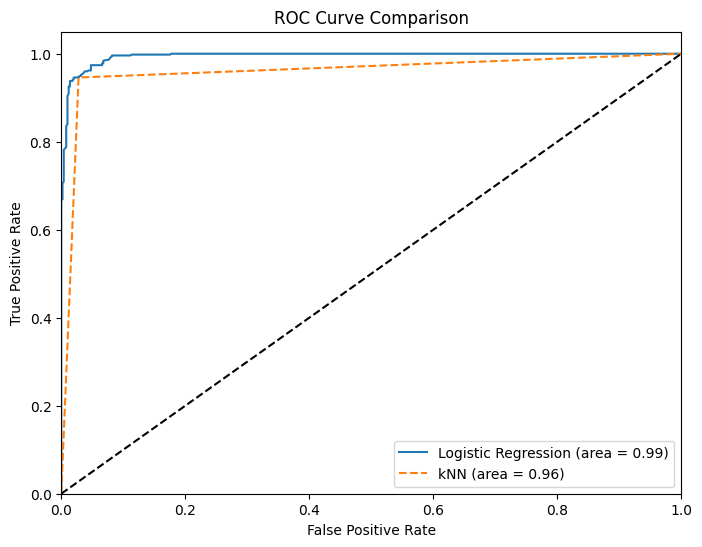

In [36]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN (area = %0.2f)' % knn_roc_auc, linestyle='dashed')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()